In [1]:
%load_ext autoreload
%autoreload 2

# Linear Regression

In [2]:
from si.util import summary
from si.data import Dataset
from si.data.scale import StandardScaler
from si.supervised import LinearRegression,LinearRegressionReg
import numpy as np
import os

In [3]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/lr-example1.data')
dataset = Dataset.from_data(filename, labeled=True)
StandardScaler().fit_transform(dataset,inline=True)
summary(dataset)

,mean,std,var,max,min
A,2.987301e-16,1.000000,1.00000,3.647694,-0.813765
y,5.839135e+00,5.481785,30.04997,24.147000,-2.680700


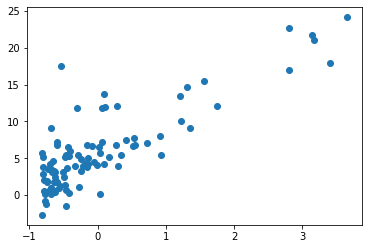

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
if dataset.X.shape[1]==1:
    plt.scatter(dataset.X, dataset.y)
    plt.show()


## Linear Regression using closed form 

In [5]:
lr = LinearRegression()
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [5.83913505 4.59304113]


In [6]:
idx = 10
x = dataset.X[idx]
print("x = ",x)
y = dataset.y[idx]
y_pred = lr.predict(x)
print("y_pred = ",y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.9172763535616566
y_true =  3.2522


In [7]:
lr.cost()

4.476971375975178

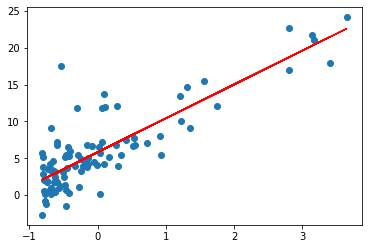

In [8]:
if dataset.X.shape[1] == 1:
    plt.scatter(dataset.X, dataset.y)
    plt.plot(lr.X[:,1], np.dot(lr.X, lr.theta), '-', color='red')
    plt.show()


## Linear Regression using gradient descent

In [9]:
lr = LinearRegression(gd=True,epochs=50000)
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.59304113]


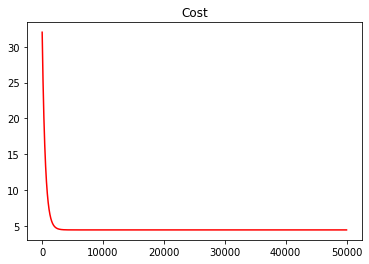

In [10]:
plt.plot(list(lr.history.keys()), [ y[1] for y in lr.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

# Linear Regression with Regularization

In [11]:
lr = LinearRegressionReg()
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.54617337]


In [12]:
idx = 10
x = dataset.X[idx]
print("x = ", x)
y = dataset.y[idx]
y_pred = lr.predict(x)
print("y_pred = ", y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.947091238234969
y_true =  3.2522


# Logistic Regression

In [13]:
from si.supervised import LogisticRegression, LogisticRegressionReg
import pandas as pd

In [14]:
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")
y = [int(x != 'Iris-setosa') for x in iris.y]
dataset = Dataset(iris.X[:,:2],np.array(y))
summary(dataset)

,mean,std,var,max,min
A,5.843333,0.825301,0.681122,7.9,4.3
B,3.054000,0.432147,0.186751,4.4,2.0
y,0.666667,0.471405,0.222222,1.0,0.0


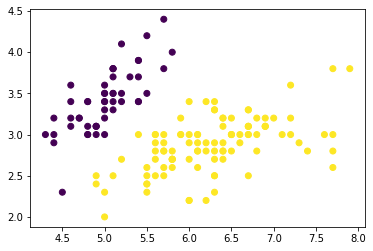

In [15]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
plt.show()

In [16]:
logreg = LogisticRegression(epochs=20000)

In [17]:
logreg.fit(dataset)
logreg.theta

array([ -6.40343083,   7.44784002, -10.92875778])

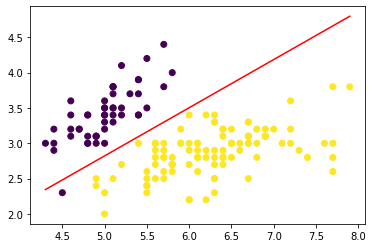

In [18]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

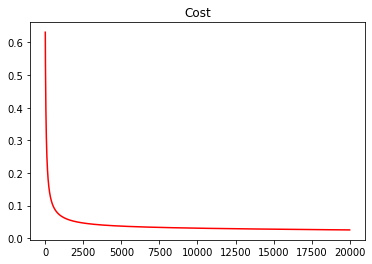

In [19]:
plt.plot(list(logreg.history.keys()), [ y[1] for y in logreg.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

In [20]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1.0


# Logistic Regression with L2 regularization

In [21]:
logreg = LogisticRegressionReg()
logreg.fit(dataset)
logreg.theta

array([-1.0085031 ,  3.41993792, -5.5764473 ])

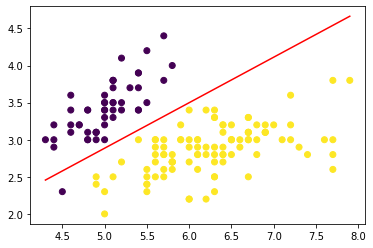

In [22]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

In [23]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1.0


# Cross Validation

In [24]:
from si.util.cv import CrossValidationScore
from si.supervised import KNN

knn = KNN(3)
cv = CrossValidationScore(knn, dataset, cv=5)
cv.run()
cv.toDataframe()

array([[0.99166667, 0.99166667, 0.99166667, 1.        , 0.99166667],
       [0.99166667, 0.99166667, 0.99166667, 1.        , 0.99166667]])

In [25]:
logreg = LogisticRegression(epochs=1000)
cv = CrossValidationScore(logreg, dataset, cv=5)
cv.run()
cv.toDataframe()

array([[0.08518584, 0.07944624, 0.08079673, 0.06521769, 0.07630009],
       [0.04740207, 0.07088277, 0.0725916 , 0.12671474, 0.08746837]])

In [26]:
logreg = LogisticRegressionReg(epochs=1000, lbd=1.0)
cv = CrossValidationScore(logreg, dataset, cv=5)
cv.run()
cv.toDataframe()

array([[0.22460568, 0.24027736, 0.24078596, 0.24254799, 0.24052693],
       [0.79048024, 0.67820073, 0.68000765, 0.66011231, 0.6911196 ]])

# Grid Search with Cross Validation

In [30]:
from si.util.cv import GridSearchCV

parameters ={'epochs':[100,200,400,800,1000],'lbd':[0,0.2,0.4,0.6]}
gs = GridSearchCV(logreg, dataset, parameters, cv=3, split=0.8)
gs.run()
df = gs.toDataframe()

df.sort_values(by=['CV_1 train','CV_1 test'])


,CV_1 train,CV_2 train,CV_3 train,CV_1 test,CV_2 test,CV_3 test
16,0.080508,0.082562,0.071932,0.070253,0.054292,0.097784
12,0.084598,0.092185,0.083563,0.105663,0.065753,0.117500
17,0.112950,0.108239,0.118663,0.189452,0.214768,0.166259
8,0.120866,0.132827,0.132615,0.164734,0.121449,0.128331
13,0.125497,0.112689,0.117687,0.147380,0.203392,0.182621
18,0.131429,0.132108,0.142232,0.373755,0.351920,0.325500
14,0.141351,0.145128,0.139472,0.299569,0.282009,0.307563
9,0.147705,0.148531,0.148157,0.183915,0.183623,0.182539
15,0.164466,0.170301,0.171719,0.410743,0.401803,0.386506
10,0.164717,0.156961,0.167462,0.233539,0.271631,0.236475
